# This notebook explains the intuition of PCA components
Data Use is from: http://setosa.io/ev/principal-component-analysis/

In [73]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

import visuals as vs

In [94]:
# Collect Data
data = np.array(
[
[375,135,458,475],
[57,47,53,73],
[245,267,242,227],
[1472,1494,1462,1582],
[105,66,103,103],
[54,41,62,64],
[193,209,184,235],
[147,93,122,160],
[1102,674,957,1137],
[720,1033,566,874],
[253,143,171,265],
[685,586,750,803],
[488,355,418,570],
[198,187,220,203],
[360,334,337,365],
[1374,1506,1572,1256],
[156,139,147,175]
]
)
data = data.transpose()
data = np.log(data)
data = pd.DataFrame(
    data, 
    columns=['Alcoholicdrinks','Beverages','Carcasemeat','Cereals','Cheese','Confectionery',
             'Fatsandoils','Fish', 'Freshfruit','Freshpotatoes','FreshVeg','Othermeat','OtherVeg',
             'Processedpotatoes','ProcessedVeg','Softdrinks','Sugars'],
    index=['England', 'N_Ireland', 'Scotland', 'Wales']
)
data.head()

,Alcoholicdrinks,Beverages,Carcasemeat,Cereals,Cheese,Confectionery,Fatsandoils,Fish,Freshfruit,Freshpotatoes,FreshVeg,Othermeat,OtherVeg,Processedpotatoes,ProcessedVeg,Softdrinks,Sugars
England,5.926926,4.043051,5.501258,7.294377,4.653960,3.988984,5.262690,4.990433,7.004882,6.579251,5.533389,6.529419,6.190315,5.288267,5.886104,7.225481,5.049856
N_Ireland,4.905275,3.850148,5.587249,7.309212,4.189655,3.713572,5.342334,4.532599,6.513230,6.940222,4.962845,6.373320,5.872118,5.231109,5.811141,7.317212,4.934474
Scotland,6.126869,3.970292,5.488938,7.287561,4.634729,4.127134,5.214936,4.804021,6.863803,6.338594,5.141664,6.620073,6.035481,5.393628,5.820083,7.360104,4.990433
Wales,6.163315,4.290459,5.424950,7.366445,4.634729,4.158883,5.459586,5.075174,7.036148,6.773080,5.579730,6.688355,6.345636,5.313206,5.899897,7.135687,5.164786


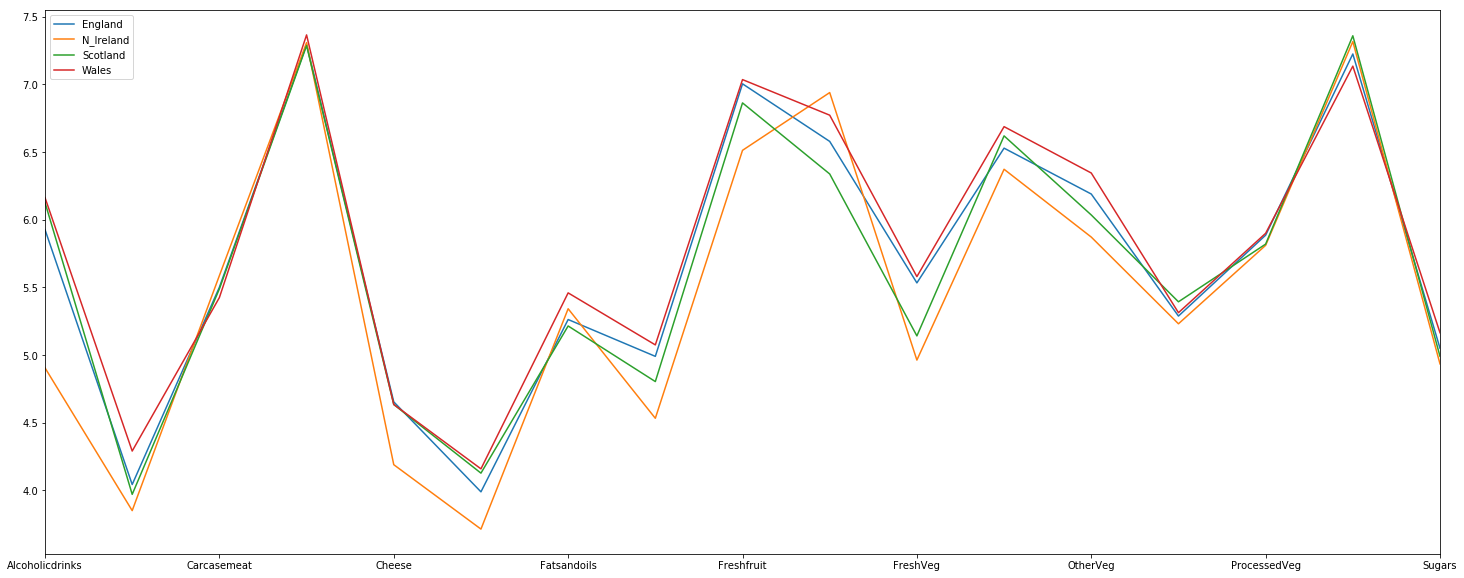

In [101]:
data.T.plot(figsize=(25,10))

In [102]:
data.head()

,Alcoholicdrinks,Beverages,Carcasemeat,Cereals,Cheese,Confectionery,Fatsandoils,Fish,Freshfruit,Freshpotatoes,FreshVeg,Othermeat,OtherVeg,Processedpotatoes,ProcessedVeg,Softdrinks,Sugars
England,5.926926,4.043051,5.501258,7.294377,4.653960,3.988984,5.262690,4.990433,7.004882,6.579251,5.533389,6.529419,6.190315,5.288267,5.886104,7.225481,5.049856
N_Ireland,4.905275,3.850148,5.587249,7.309212,4.189655,3.713572,5.342334,4.532599,6.513230,6.940222,4.962845,6.373320,5.872118,5.231109,5.811141,7.317212,4.934474
Scotland,6.126869,3.970292,5.488938,7.287561,4.634729,4.127134,5.214936,4.804021,6.863803,6.338594,5.141664,6.620073,6.035481,5.393628,5.820083,7.360104,4.990433
Wales,6.163315,4.290459,5.424950,7.366445,4.634729,4.158883,5.459586,5.075174,7.036148,6.773080,5.579730,6.688355,6.345636,5.313206,5.899897,7.135687,5.164786


,Explained Variance,Alcoholicdrinks,Beverages,Carcasemeat,Cereals,Cheese,Confectionery,Fatsandoils,Fish,Freshfruit,Freshpotatoes,FreshVeg,Othermeat,OtherVeg,Processedpotatoes,ProcessedVeg,Softdrinks,Sugars
Dimension 1,0.8245,-0.6947,-0.1791,0.0752,-0.0126,-0.2626,-0.2307,-0.0078,-0.2692,-0.2783,0.1823,-0.2966,-0.1516,-0.2134,-0.0546,-0.0395,0.0637,-0.0949
Dimension 2,0.1475,0.2846,-0.2763,0.0333,-0.0780,0.0997,0.0910,-0.2605,-0.2166,-0.1004,-0.5768,-0.4259,0.0109,-0.2716,0.1293,-0.0821,0.2377,-0.1561
Dimension 3,0.0280,-0.2308,-0.3122,0.1180,-0.1306,0.2260,-0.3323,-0.3448,0.1866,0.2553,-0.2686,0.4857,-0.3137,-0.0229,-0.1200,0.0630,0.0066,-0.1120
Dimension 4,0.0000,0.1323,-0.0611,-0.1827,-0.3146,-0.1335,-0.0149,-0.0111,0.4100,-0.5189,-0.0046,0.1188,-0.0657,-0.2082,0.0758,-0.3534,-0.4115,-0.1705


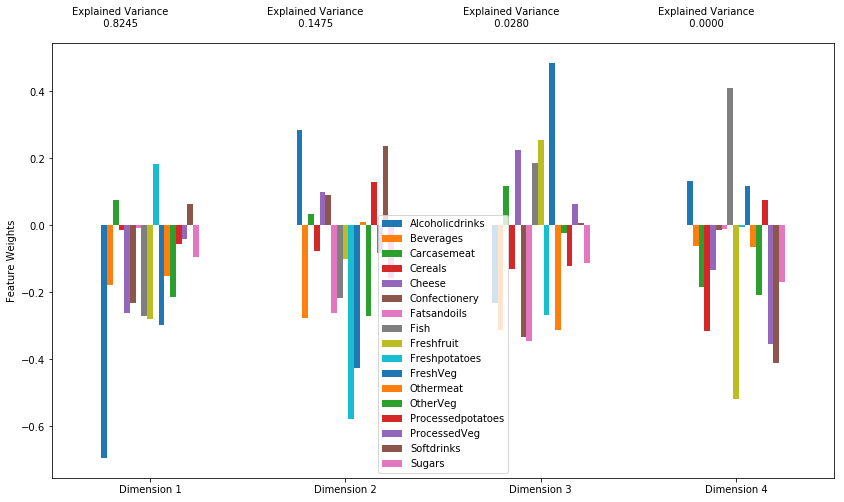

In [88]:
pca=PCA().fit(data)
vs.pca_results(pd.DataFrame(data), pca)

In [91]:
transformed_data = pca.transform(data)
pd.DataFrame(transformed_data, columns = ['D1', 'D2', 'D3', 'D4'], index=['England', 'N_Ireland', 'Scotland', 'Wales'])

,D1,D2,D3,D4
England,-0.311847,-0.066219,0.222943,1.377385e-15
N_Ireland,1.233119,-0.087470,-0.026827,1.352660e-15
Scotland,-0.272865,0.497582,-0.065393,1.401186e-15
Wales,-0.648408,-0.343893,-0.130723,1.411769e-15


# Intuition Explain
### PCA Components and transformed log value

#### Component 1
As showed in the chart above, PCA component 1 explains the variace in amount of Alcoholic Drinks (the less the larger value) and Fresh Potatoes (the more the larger value). 
And looking at the transformed log data below, N_Ireland is furthest from the mean (0). Look back at the raw data above, North Ireland does consume less Alcoholic Drinks but more Fresh Potatoes. 

#### Component 2
PCA component 2 does the oposite to the component 1 by identifying country consumes more Alcoholic Drinks and Soft Drinks but less Fresh Potatos and Fresh Veg. 
Scotland has the highest value here which is proven correct by the raw data. 